# Table of Contents
 <p><div class="lev2 toc-item"><a href="#Proportional-Symbol-Maps-using-GeoPandas" data-toc-modified-id="Proportional-Symbol-Maps-using-GeoPandas-01"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Proportional Symbol Maps using GeoPandas</a></div><div class="lev1 toc-item"><a href="#Usage" data-toc-modified-id="Usage-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Usage</a></div><div class="lev1 toc-item"><a href="#Todo" data-toc-modified-id="Todo-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Todo</a></div><div class="lev1 toc-item"><a href="#Examples" data-toc-modified-id="Examples-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Examples</a></div>

# Proportional Symbol Maps using GeoPandas
## Usage

The basic function accepts a GeoPandas GeoDataFrame and the column name of the field for which you want to create proportional symbols. There are a number of different symbols to choose from, with circles set as the default. You can also adjust the position of the points on which the symbols are centered, although the 'centroid' default should be fine for most applications.

The scale_factor parameter is important, because the initial size of the symbols is arbitrarily defined. The scale_factor adjusts the symbols to suit the visual preferences of users. scale_factor < 1 makes the symbols smaller, scale_factor > 1 makes them larger. The scale_factor you need will depend on both the magnitudes of values being represented, and the geography in question. Setting the scale_factor is largely a question of trial - and - error and the 'best' scale_factor for a given map is a question of personal preference.

As GeoPandas map plotting is based on matplotlib, the process of plotting a proportional symbols map is as simple as creating a plot, plotting the original map as a base map, and then plotting the PatchCollection returned from the prop_symbols function using matplotlib's 'add_collection' method.

NB The field for which proportional symbols are to be created should contain values which are positive and greater than zero. It is important that the input data be in a projected (Cartesian) coordinate system. The GeoDataFrame should be structured so that 1 row is 1 record.

## Todo

1. Figure legends.
2. Classified proportional symbols.

## Examples

In [25]:
# Some required libraries.
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# import the proportional symbols function
from cartogrampy.propsymbols import propsymbols

%matplotlib inline

In [7]:
# Get some data for London
# Read in London Boroughs geojson and project to British National Grid.
ldn_boro = gpd.read_file('data/LDN_Boro.geojson').to_crs(epsg=27700)

# Get some population data for London Boroughs
ldn_pop = pd.read_excel('data/Pandas_Lon_Pop.xlsx')

# Merge the population data with the geospatial data
ldn_boro = ldn_boro.merge(ldn_pop, how='left', left_on='GSS_CODE', right_on='New Code')

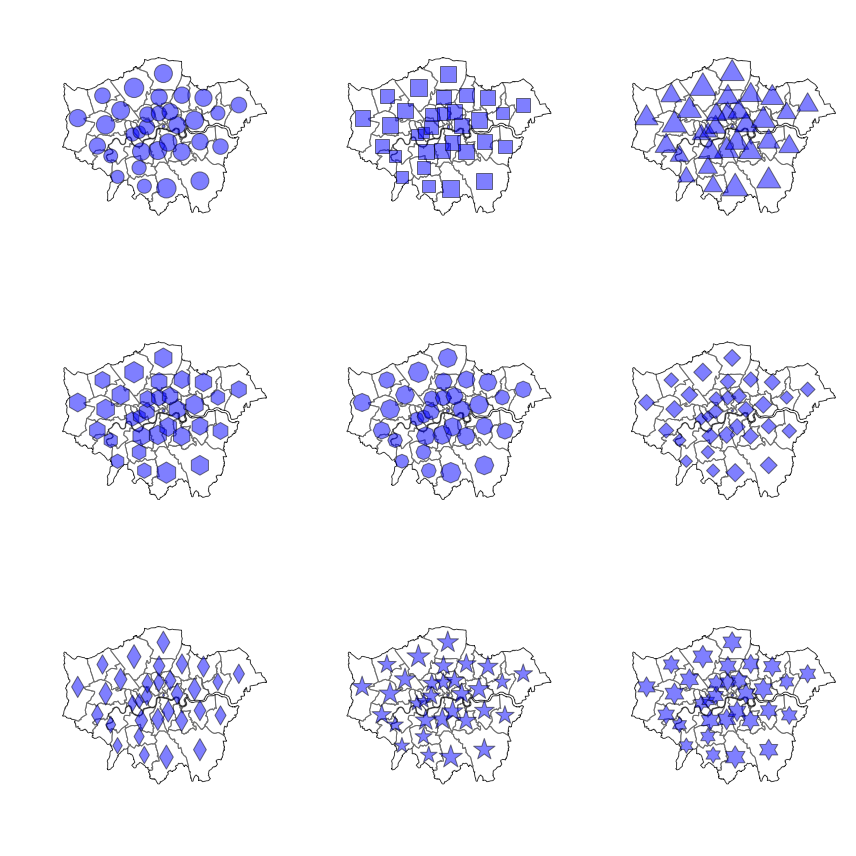

In [28]:
# Plot symbols on map
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(12,12))

# ax1
circles = propsymbols(ldn_boro, 2015, 'geometry', 'circle', 8)
ldn_boro.plot(color='w', ax=ax1, zorder=0)
ax1.add_collection(circles)
ax1.axis('equal')
ax1.axis('off')

# ax2
squares = propsymbols(ldn_boro, 2015, 'geometry', 'square', 8)
ldn_boro.plot(color='w', ax=ax2, zorder=0)
ax2.add_collection(squares)
ax2.axis('equal')
ax2.axis('off')

# ax3
triangles = propsymbols(ldn_boro, 2015, 'geometry', 'triangle', 8)
ldn_boro.plot(color='w', ax=ax3, zorder=0)
ax3.add_collection(triangles)
ax3.axis('equal')
ax3.axis('off')

# ax4
hexagons = propsymbols(ldn_boro, 2015, 'geometry', 'hexagon', 8)
ldn_boro.plot(color='w', ax=ax4, zorder=0)
ax4.add_collection(hexagons)
ax4.axis('equal')
ax4.axis('off')

# ax5
octagons = propsymbols(ldn_boro, 2015, 'geometry', 'octagon', 8)
ldn_boro.plot(color='w', ax=ax5, zorder=0)
ax5.add_collection(octagons)
ax5.axis('equal')
ax5.axis('off')

# ax6
rhombuses = propsymbols(ldn_boro, 2015, 'geometry', 'rhombus', 6)
ldn_boro.plot(color='w', ax=ax6, zorder=0)
ax6.add_collection(rhombuses)
ax6.axis('equal')
ax6.axis('off')

# ax7
lozenges = propsymbols(ldn_boro, 2015, 'geometry', 'lozenge', 6)
ldn_boro.plot(color='w', ax=ax7, zorder=0)
ax7.add_collection(lozenges)
ax7.axis('equal')
ax7.axis('off')

# ax8
pentagrams = propsymbols(ldn_boro, 2015, 'geometry', 'pentagram', 6)
ldn_boro.plot(color='w', ax=ax8, zorder=0)
ax8.add_collection(pentagrams)
ax8.axis('equal')
ax8.axis('off')

# ax9
hexagrams = propsymbols(ldn_boro, 2015, 'geometry', 'hexagram', 4)
ldn_boro.plot(color='w', ax=ax9, zorder=0)
ax9.add_collection(hexagrams)
ax9.axis('equal')
ax9.axis('off')

plt.tight_layout()

# plt.savefig('LDN_prop_symbols.png', dpi=300)

In [40]:
# Get some data for US States
usstate = gpd.read_file('data/US_State_2016_5m.geojson')

# Set crs
usstate.crs = {'init': u'epsg:4269'}

# Get continental US and project to NAD83 Contiguous US Albers.
usstate = usstate[~usstate['STUSPS'].isin(['AK', 'HI', 'AS', 'PR',
                                           'GU', 'MP', 'VI'])].to_crs({'init': 'epsg:5070'})
# Read in state populations
state_pop = pd.read_excel('data/Pandas_US_Pop.xlsx')

# Merge population data
usstate = usstate.merge(state_pop, how='left', left_on='STUSPS', right_on='Code')

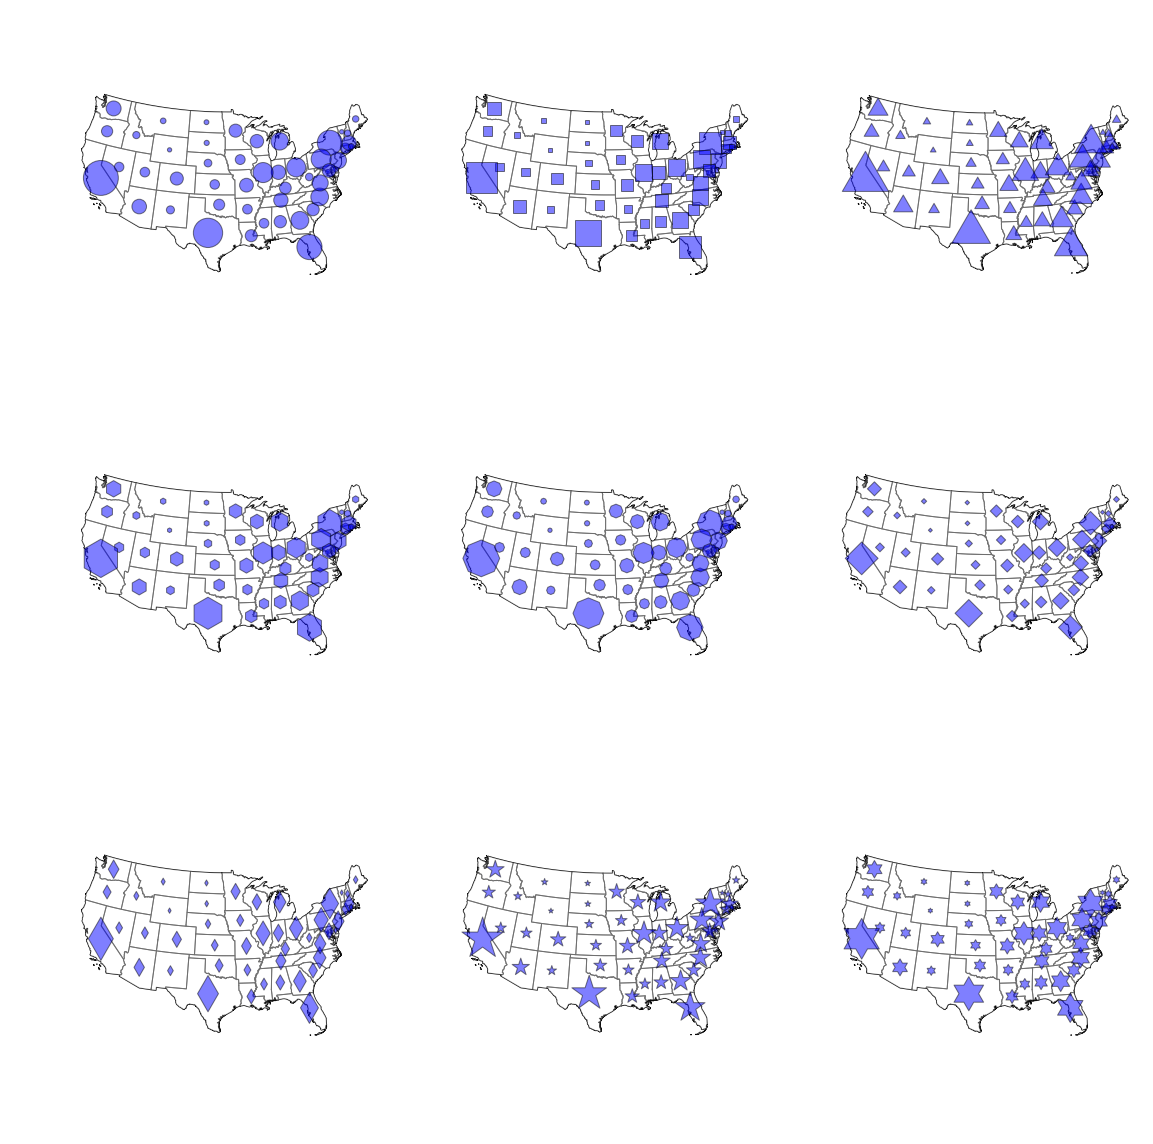

In [44]:
# Plot symbols on map
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(16, 16))

# ax1
circles = propsymbols(usstate, 2015, 'geometry', 'circle', 80)
usstate.plot(color='w', ax=ax1, zorder=0)
ax1.add_collection(circles)
ax1.axis('equal')
ax1.axis('off')

# ax2
squares = propsymbols(usstate, 2015, 'geometry', 'square', 80)
usstate.plot(color='w', ax=ax2, zorder=0)
ax2.add_collection(squares)
ax2.axis('equal')
ax2.axis('off')

# ax3
triangles = propsymbols(usstate, 2015, 'geometry', 'triangle', 80)
usstate.plot(color='w', ax=ax3, zorder=0)
ax3.add_collection(triangles)
ax3.axis('equal')
ax3.axis('off')

# ax4
hexagons = propsymbols(usstate, 2015, 'geometry', 'hexagon', 80)
usstate.plot(color='w', ax=ax4, zorder=0)
ax4.add_collection(hexagons)
ax4.axis('equal')
ax4.axis('off')

# ax5
octagons = propsymbols(usstate, 2015, 'geometry', 'octagon', 80)
usstate.plot(color='w', ax=ax5, zorder=0)
ax5.add_collection(octagons)
ax5.axis('equal')
ax5.axis('off')

# ax6
rhombuses = propsymbols(usstate, 2015, 'geometry', 'rhombus', 60)
usstate.plot(color='w', ax=ax6, zorder=0)
ax6.add_collection(rhombuses)
ax6.axis('equal')
ax6.axis('off')

# ax7
lozenges = propsymbols(usstate, 2015, 'geometry', 'lozenge', 60)
usstate.plot(color='w', ax=ax7, zorder=0)
ax7.add_collection(lozenges)
ax7.axis('equal')
ax7.axis('off')

# ax8
pentagrams = propsymbols(usstate, 2015, 'geometry', 'pentagram', 60)
usstate.plot(color='w', ax=ax8, zorder=0)
ax8.add_collection(pentagrams)
ax8.axis('equal')
ax8.axis('off')

# ax9
hexagrams = propsymbols(usstate, 2015, 'geometry', 'hexagram', 40)
usstate.plot(color='w', ax=ax9, zorder=0)
ax9.add_collection(hexagrams)
ax9.axis('equal')
ax9.axis('off')

plt.tight_layout()

# plt.savefig('US_State_prop_symbols.png', dpi=300)